In [15]:
import matplotlib.pyplot as plt
import numpy as np
import sys
import re
import os
sys.path.append('/gpfs0/home/e0031794/Documents/DeePyMoD/src')
from deepymod.utilities import library_matrix_mat, print_PDE, tensorboard_to_dataframe

In [92]:
#plot cost changes for deepmod
def plot_cost(data_frame, cost_plot_path):
    
    """
        data_frame (pandas df): pandas data frame
        cost_plot (str): file path of cost_plot with .png extension

        
    """
    fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(15,8.0))
    
    ax1.semilogy(data_frame['epoch'], data_frame['MSE_cost_0'], label='MSE')
    ax1.semilogy(data_frame['epoch'], data_frame['PI_cost_0'], label='Reg')
    ax1.semilogy(data_frame['epoch'], data_frame['L1_cost_0'], label=r'L$_1$')
    ax1.semilogy(data_frame['epoch'], data_frame['Total_cost_1'], label='Total cost')
    ax1.set(ylabel='Cost')
    ax1.set_xlabel('Epoch')
    ax1.legend(loc='best')
    
    plt.savefig(cost_plot_path)

#plot coefficient changes for deepmod
def plot_coeff(data_frame, coeff_plot_path):
    
    """
        data_frame (pandas df): pandas data frame
        cost_plot (str): file path of cost_plot with .png extension
        
    """
    fig, ax1 = plt.subplots(ncols=1, nrows=1, figsize=(15,8.0))
    u = ['1', 'u', 'u^2']
    du = ['1', 'u_{x}', 'u_{xx}', 'u_{xxx}']
    coeffs = library_matrix_mat(u, du)
    coeffs_terms = []
    
    for coeff_vec in np.array(data_frame['coeffs'].values):
        coeffs_terms.append(np.expand_dims(coeff_vec, axis=1))
    coeffs_np = np.array(coeffs_terms).squeeze()


    for i in np.arange(len(coeffs)):
        label = '$'+coeffs[i]+'$'
        line = ax1.plot(data_frame['epoch'], coeffs_np[:, i], label=label)

    ax1.set(xlabel=r'Epochs', ylabel='Coefficient')
    ax1.legend()
    
    plt.savefig(coeff_plot_path)
    
#plot individual diagrams
def plot(event_path, cost_plot, coeff_plot):
    
    """
        event_path (str): path to events.out.tf_events
        cost_plot (str): name of cost_plot with .png extension
        coeff_plot (str): name of coeff_plot with .png extension
        
    """
    os.chdir(event_path)
    event = [ f for f in os.listdir(event_path) if '.bakkutteh' in f][0]
    data_frame = tensorboard_to_dataframe(event)
    
    cost_plot_path = os.path.join(event_path, cost_plot)
    coeff_plot_path = os.path.join(event_path, coeff_plot)
    
    plot_cost(data_frame, cost_plot_path)
    plot_coeff(data_frame, coeff_plot_path)

def count_percent(value, total):
    
    """
        value (str): an integer value
    
    """
    return round(((total - value) / total) * 100, 2)

def plot_cost_subplot(data_frame, cost_ax, subplot_title, coord):
    
    """
        data_frame (pandas df): pandas data frame
        cost_ax : matplotlib ax object
        subplot_title (str): title of a subplot
        coord (tuple): x,y coordinates of a subplot
        
    """
    
    x, y = coord
        
    cost_ax[x,y].semilogy(data_frame['epoch'], data_frame['MSE_cost_0'], label='MSE')
    cost_ax[x,y].semilogy(data_frame['epoch'], data_frame['PI_cost_0'], label='Reg')
    cost_ax[x,y].semilogy(data_frame['epoch'], data_frame['L1_cost_0'], label=r'L$_1$')
    cost_ax[x,y].semilogy(data_frame['epoch'], data_frame['Total_cost_1'], label='Total cost')
    cost_ax[x,y].set(ylabel='Cost')
    cost_ax[x,y].set_xlabel('Epoch')
    cost_ax[x,y].legend(loc='best')
    cost_ax[x,y].set_title(subplot_title)

def plot_coeff_subplot(data_frame, coeff_ax, subplot_title, coord):
    
    """
        data_frame (pandas df): pandas data frame
        coeff_ax : matplotlib ax object
        subplot_title (str): title of a subplot
        coord (tuple): x,y coordinates of a subplot
        
    """
    
    x, y = coord
    u = ['1', 'u', 'u^2']
    du = ['1', 'u_{x}', 'u_{xx}', 'u_{xxx}']
    coeffs = library_matrix_mat(u, du)
    coeffs_terms = []
    
    for coeff_vec in np.array(data_frame['coeffs'].values):
        coeffs_terms.append(np.expand_dims(coeff_vec, axis=1))
    coeffs_np = np.array(coeffs_terms).squeeze()


    for i in np.arange(len(coeffs)):
        label = '$'+coeffs[i]+'$'
        line = coeff_ax[x,y].plot(data_frame['epoch'], coeffs_np[:, i], label=label)

    coeff_ax[x,y].set(xlabel=r'Epochs', ylabel='Coefficient', title=subplot_title)
    coeff_ax[x,y].legend()
    

    
#plot multiple diagrams into 1
def plot_multi(event_folder):
    
    """
        event_folder (str): path to multiple events.out.tf_events
    
    """
    os.chdir(event_folder)
    event_files = [file for file in os.listdir(event_folder) if '.bakkutteh' in file]
    coord = [(0,0), (0,1), (1,0), (1,1)]
    
    cost_fig, cost_ax = plt.subplots(ncols=2, nrows=2, figsize=(20,11))
    index = 0 
    for event in event_files:
        subset = event.split('_')[0]
        percent = count_percent(int(subset), 10001)
        data_frame = tensorboard_to_dataframe(event)
        subplot_title = str(percent) + "% of input data"  
        plot_cost_subplot(data_frame, cost_ax, subplot_title, coord[index])   
        index += 1 
        
    plt.savefig('combined_cost_plot.png')
    
    coeff_fig, coeff_ax = plt.subplots(ncols=2, nrows=2, figsize=(20,11))
    index = 0 
    for event in event_files:
        subset = event.split('_')[0]
        percent = count_percent(int(subset), 10001)
        data_frame = tensorboard_to_dataframe(event)
        subplot_title = str(percent) + "% of input data"
        plot_coeff_subplot(data_frame, coeff_ax, subplot_title, coord[index])
        index += 1 
        
    plt.savefig('combined_coeff_plot.png')
    
    

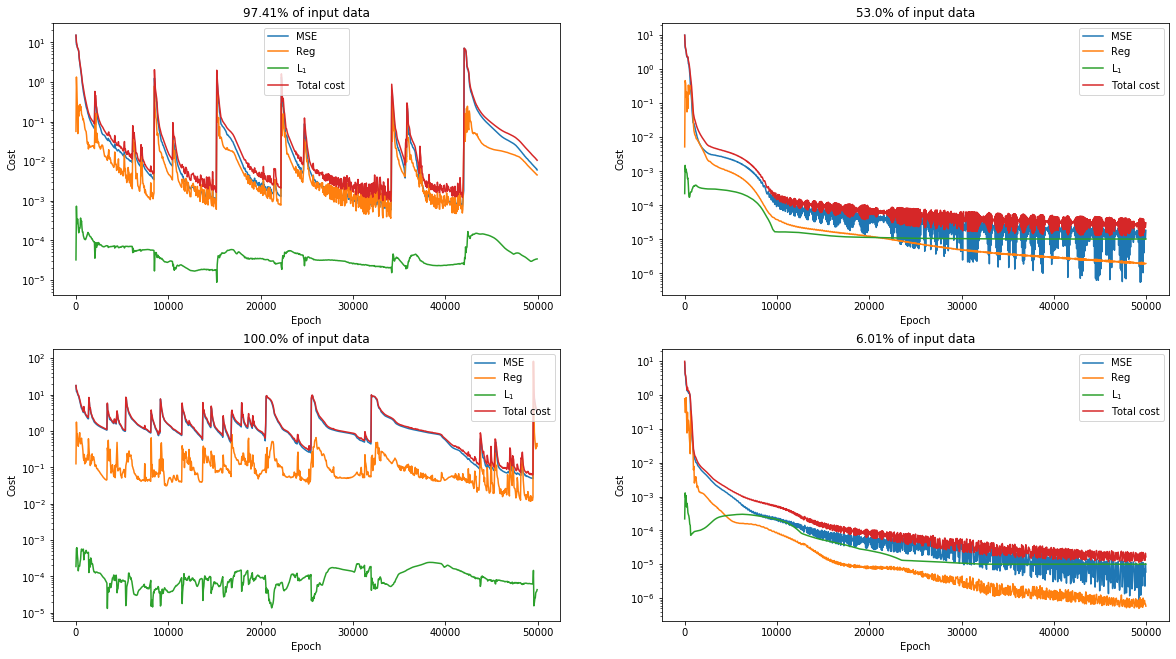

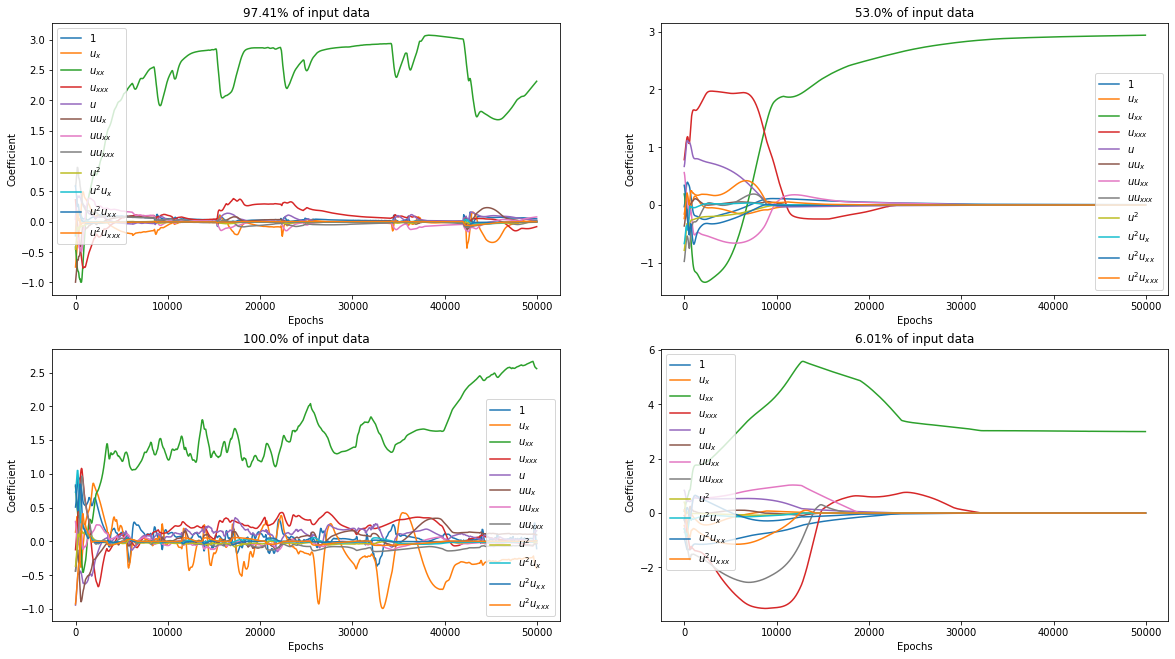

In [93]:
#path = '/gpfs0/home/e0031794/Documents/FYP/FYP_results_11_9_2019/data_slicing/1_trial/0_subset/Out_subset_0_expt/20200103_185854/iteration_0'
#plot(path, 'cost.png', 'coeff.png')

path = '/gpfs0/home/e0031794/Documents/FYP/FYP_results_11_9_2019/data_slicing/1_trial/tf_events'
plot_multi(path)